# Linear Regression with Gradient Descent from scratch
### Jaeho Kim    kjh3690@unist.ac.kr

In [244]:
#import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import time
%matplotlib inline

**we will use the wine quality data for implementation**

In [245]:
# load wine-quality csv file
Data_dir='/nipa/jaeho3690/7_CS229/0_DATA/winequality-red.csv'
df= pd.read_csv(Data_dir,delimiter=';',dtype=float)

In [246]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [247]:
#Split the data set into predictors and response
train_x= df.iloc[:1300,:-1]
train_y= df.iloc[:1300,-1]
test_x= df.iloc[1300:,:-1]
test_y= df.iloc[1300:,-1]

**We will need a function that predicts y value using the coefficients and x. This will be used to calculate the error**

In [248]:
def predict(coef,x):
    """Gives prediction of y using linear regression given coefficients and x.
    
    Args:
        coef: list of coefficents including bias
        x: list of input data x
        
    Returns:
        y_hat: predicted y value
    
    Raises:
        AssertionError: length of coef should be bigger by 1 than x because of bias 
    """
    assert len(x)+1== len(coef), "len(coef) should be bigger than x due to bias term"
    y_hat= coef[0]
    
    for i in range(len(x)):
        y_hat+= x[i]*coef[i+1]
        
    return y_hat

In [249]:
coef=[1,3,2,3]
x=[-3,-3,-4]

In [250]:
predict(coef,x)

-26

# 1. Stochastic Gradient Descent Update

In [251]:
learning_rate= 0.0001
n_epochs=1000

**If we set the learning rate bigger, the algorithm diverges.**

In [252]:
def fit_SGD_update(train_x,train_y,learning_rate=0.0001,n_epochs=1000):
    """The Least Mean Square updates using stochastic gradient descent.
    
    Args:
        train_x: df of predictors
        train_y: df of response
        learning_rate: learning rate of updates
        n_epochs: number of iterations for SGD
        
    Returns:
        coefs: coefficents of linear regression 
        sum_of_square_error: square of errors
    
    """
    start_time= time.time()
    coefs= [random.randrange(1, 50, 1) for i in range(len(train_x.columns)+1)] 
    sum_of_square_error=[]
    print("Initial setting of coefficient are :",coefs)
    print("-"*80)
    for epoch in range(n_epochs):
        for row in range(len(train_x)):
            for coef in range(len(coefs)):
                error= train_y[row]-predict(coefs,list(train_x.iloc[row,:]))
                #The bias term doesn't have x. We have to take this in consideration
                if coef==0:
                    coefs[coef]+= learning_rate *error
                else:
                    coefs[coef]+= learning_rate *error * train_x.iloc[row,coef-1]


        #After Every Epoch we will calculate the sum of square:
        error_sum=0
        for row in range(len(train_x)):
            error_sum+= (train_y[row]- predict(coefs,list(train_x.iloc[row,:])))**2
        sum_of_square_error.append(error_sum)
        if epoch%50==0:
            print("Sum of square error is {0} for epoch {1}".format(error_sum,epoch)) 
    duration= (time.time()- start_time)/60
    print("The algorithm took {} minutes to run".format(duration))
    return coefs,sum_of_square_error

In [253]:
coefs,sse=fit_SGD_update(train_x,train_y)

Initial setting of coefficient are : [40, 1, 43, 47, 10, 37, 34, 30, 8, 2, 14, 3]
--------------------------------------------------------------------------------
Sum of square error is 1046156.1191418559 for epoch 0
Sum of square error is 115962.9762078562 for epoch 50
Sum of square error is 80281.0635107808 for epoch 100
Sum of square error is 64479.874297147646 for epoch 150
Sum of square error is 54776.833172272156 for epoch 200
Sum of square error is 47561.825146245006 for epoch 250
Sum of square error is 41714.1094981337 for epoch 300
Sum of square error is 36795.94438921576 for epoch 350
Sum of square error is 32589.234792213116 for epoch 400
Sum of square error is 28960.775635050657 for epoch 450
Sum of square error is 25816.746156040866 for epoch 500
Sum of square error is 23084.9210492911 for epoch 550
Sum of square error is 20706.751160778844 for epoch 600
Sum of square error is 18633.38685996032 for epoch 650
Sum of square error is 16823.42499156348 for epoch 700
Sum of squ

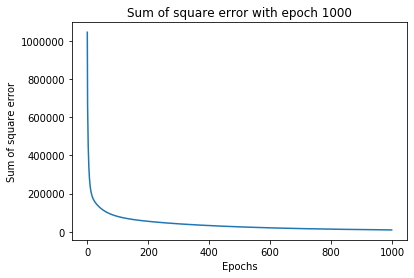

In [254]:
plt.title("Sum of square error with epoch {}".format(n_epochs))
plt.xlabel("Epochs")
plt.ylabel("Sum of square error")
plt.plot(sse)

In [255]:
predict(coefs,list(test_x.iloc[0,:]))

4.026995413376814

In [256]:
coefs

[26.9535365054063,
 -1.3995297110905407,
 7.261350197179469,
 13.312278574688023,
 -0.17565640246276562,
 19.157229175506895,
 0.02906160634271056,
 -0.04005600580669356,
 4.644113168435324,
 -7.451746607838896,
 -1.444117748581172,
 0.2902713305766749]

In [257]:
test_x.iloc[0,:]

fixed acidity            5.20000
volatile acidity         0.64500
citric acid              0.00000
residual sugar           2.15000
chlorides                0.08000
free sulfur dioxide     15.00000
total sulfur dioxide    28.00000
density                  0.99444
pH                       3.78000
sulphates                0.61000
alcohol                 12.50000
Name: 1300, dtype: float64

In [258]:
test_y.iloc[0]

6.0

# 2. Batch Gradient Descent

In [259]:
def Batch_update(train_x,train_y,learning_rate=0.00000001,n_epochs=1000):
    """The Least Mean Square updates using Batch gradient descent.
    
    Args:
        train_x: df of predictors
        train_y: df of response
        learning_rate: learning rate of updates
        n_epochs: number of iterations for SGD
        
    Returns:
        coefs: coefficents of linear regression 
        sum_of_square_error: square of errors
    
    """
    start_time= time.time()
    coefs= [random.randrange(1, 50, 1) for i in range(len(train_x.columns)+1)] 
    print(coefs)
    sum_of_square_error=[]
    
    for epoch in range(n_epochs):
        for coef in range(len(coefs)):
            error_sum=0
            for row in range(len(train_x)):
                if coef==0:
                    error_sum+= train_y[row]-predict(coefs,list(train_x.iloc[row,:]))
                else:
                    error_sum+= ((train_y[row]-predict(coefs,list(train_x.iloc[row,:])))*train_x.iloc[row,coef-1])  
            coefs[coef]+= learning_rate * error_sum
            
        sum_of_square=0
        for row in range(len(train_x)):
            sum_of_square+= (train_y[row]- predict(coefs,list(train_x.iloc[row,:])))**2
        sum_of_square_error.append(sum_of_square)
        if epoch%50==0:
            print("Sum of square error is {0} for epoch {1}".format(sum_of_square,epoch)) 
    duration= (time.time()- start_time)/60
    print("The algorithm took {} minutes to run".format(duration))
    return coefs,sum_of_square_error

In [260]:
coefs,SSE= Batch_update(train_x,train_y)

[9, 11, 23, 9, 17, 30, 30, 23, 26, 17, 2, 12]
Sum of square error is 5489709775.67221 for epoch 0
Sum of square error is 125905885.37444846 for epoch 50
Sum of square error is 78177861.89551888 for epoch 100
Sum of square error is 69341817.63069169 for epoch 150
Sum of square error is 61729977.5520862 for epoch 200
Sum of square error is 54963014.6431767 for epoch 250
Sum of square error is 48945022.24837774 for epoch 300
Sum of square error is 43592947.38235265 for epoch 350
Sum of square error is 38833001.402890064 for epoch 400
Sum of square error is 34599580.06041323 for epoch 450
Sum of square error is 30834352.519585185 for epoch 500
Sum of square error is 27485454.49515038 for epoch 550
Sum of square error is 24506771.11902299 for epoch 600
Sum of square error is 21857299.365686838 for epoch 650
Sum of square error is 19500581.193746176 for epoch 700
Sum of square error is 17404199.558353767 for epoch 750
Sum of square error is 15539330.320759688 for epoch 800
Sum of square erro

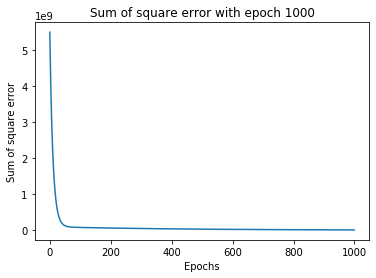

In [261]:
plt.title("Sum of square error with epoch {}".format(n_epochs))
plt.xlabel("Epochs")
plt.ylabel("Sum of square error")
plt.plot(SSE)

In [262]:
coefs

[7.6142148610598275,
 -1.1432981278390744,
 22.31146408945546,
 8.619872101441818,
 13.425871609476173,
 29.88031474650686,
 6.949041067337522,
 -3.304006571788607,
 24.64067208824469,
 12.471258775250767,
 1.1035816697403906,
 -2.6287726962745706]

## Comparison with scikit learn

In [210]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()

# Fit linear regression.
mlr.fit(train_x, train_y)

# Get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

19.535552752925913
[ 2.20655304e-02 -1.10609643e+00 -1.88336165e-01  8.17357745e-03
 -1.76877460e+00  3.33963795e-03 -3.60273580e-03 -1.55888592e+01
 -3.37284430e-01  8.09845987e-01  2.82003081e-01]
